In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config Completer.use_jedi = False

In [3]:
FPT=pd.read_csv('fpt.csv')
MWG=pd.read_csv('mwg.csv')
VCB=pd.read_csv('vcb.csv')

In [4]:
FPT.columns=['Ticker','Date','Open','High','Low','Close','Volume']
MWG.columns=['Ticker','Date','Open','High','Low','Close','Volume']
VCB.columns=['Ticker','Date','Open','High','Low','Close','Volume']

In [5]:
VCB.set_index('Date')
VCB['Date']=FPT['Date'].astype(str)
VCB['Date']=pd.to_datetime(VCB['Date'])


In [6]:
FPT.set_index('Date')
FPT['Date']=FPT['Date'].astype(str)
FPT['Date']=pd.to_datetime(FPT['Date'])


In [7]:
MWG.set_index('Date')
MWG['Date']=FPT['Date'].astype(str)
MWG['Date']=pd.to_datetime(MWG['Date'])
MWG.head()

,Ticker,Date,Open,High,Low,Close,Volume
0,MWG,2021-11-05,133.0,133.0,131.0,132.0,1635800
1,MWG,2021-11-04,128.5,130.6,128.0,129.9,950100
2,MWG,2021-11-03,128.9,130.0,127.5,128.8,1405000
3,MWG,2021-11-02,128.5,129.9,128.5,128.9,866800
4,MWG,2021-11-01,131.5,131.8,129.0,130.0,1140200


In [8]:
FPT.sort_values('Date',ascending=True,inplace=True)
MWG.sort_values('Date',ascending=True,inplace=True)
VCB.sort_values('Date',ascending=True,inplace=True)

In [9]:
FPT

,Ticker,Date,Open,High,Low,Close,Volume
3710,FPT,2006-12-13,19.2305,19.2305,19.2305,19.2305,83530
3709,FPT,2006-12-14,20.1920,20.1920,20.1920,20.1920,280710
3708,FPT,2006-12-15,21.2016,21.2016,21.2016,21.2016,265300
3707,FPT,2006-12-18,22.2593,22.2593,22.2593,22.2592,215790
3706,FPT,2006-12-19,23.3649,23.3649,23.3649,23.3650,137520
...,...,...,...,...,...,...,...
4,FPT,2021-11-01,97.4000,97.4000,95.6000,95.8000,2855800
3,FPT,2021-11-02,95.5000,97.0000,95.5000,96.1000,2109100
2,FPT,2021-11-03,96.2000,96.7000,95.2000,96.1000,2680100
1,FPT,2021-11-04,96.1000,96.8000,95.7000,96.0000,1761300


In [10]:
MWG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 1829 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  1830 non-null   object        
 1   Date    1830 non-null   datetime64[ns]
 2   Open    1830 non-null   float64       
 3   High    1830 non-null   float64       
 4   Low     1830 non-null   float64       
 5   Close   1830 non-null   float64       
 6   Volume  1830 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 114.4+ KB


In [11]:
VCB=VCB.set_index('Date')
FPT=FPT.set_index('Date')
MWG=MWG.set_index('Date')

In [12]:
VCB=VCB["2014-07-14" : "2021-11-06"]
FPT=FPT["2014-07-14" : "2021-11-06"]
MWG=MWG["2014-07-14" : "2021-11-06"]

In [13]:
FPT=FPT.reset_index('Date')
VCB=VCB.reset_index('Date')
MWG=MWG.reset_index('Date')

In [14]:
VCB

,Date,Ticker,Open,High,Low,Close,Volume
0,2014-07-14,VCB,17.3482,17.4157,17.2132,17.3482,115020
1,2014-07-15,VCB,17.4157,17.4832,17.3482,17.4157,265080
2,2014-07-16,VCB,17.4157,17.6857,17.4157,17.6182,392220
3,2014-07-17,VCB,17.5507,17.6857,17.4832,17.4832,203220
4,2014-07-18,VCB,17.6182,17.6857,17.4832,17.6857,391340
...,...,...,...,...,...,...,...
1825,2021-11-01,VCB,98.1000,98.2000,97.0000,97.0000,1057500
1826,2021-11-02,VCB,97.4000,98.0000,97.3000,97.9000,808300
1827,2021-11-03,VCB,97.7000,98.8000,97.3000,98.7000,1830000
1828,2021-11-04,VCB,98.7000,98.8000,97.2000,98.4000,989400


In [15]:
VCB=VCB.set_index('Date')
FPT=FPT.set_index('Date')
MWG=MWG.set_index('Date')

In [16]:
VCB['Upper Band']=VCB['Close'].rolling(20).mean()+2*VCB['Close'].rolling(20).std()
VCB['Lower Band']=VCB['Close'].rolling(20).mean()-2*VCB['Close'].rolling(20).std()

In [25]:
VCB=VCB.dropna()

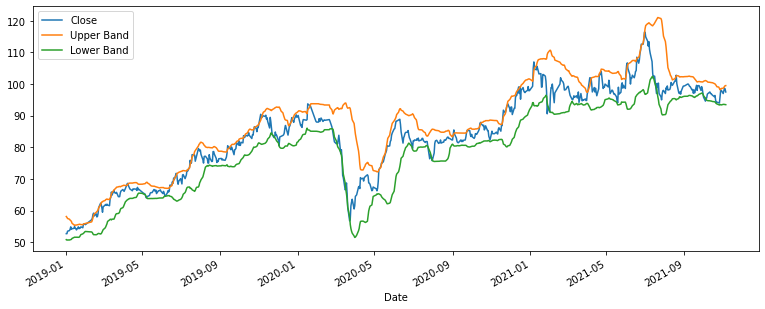

In [27]:
VCB[['Close', 'Upper Band', 'Lower Band']]['2019-01-01':].plot(figsize=(13,5));

In [19]:
FPT['Upper Band']=FPT['Close'].rolling(20).mean()+2*FPT['Close'].rolling(20).std()
FPT['Lower Band']=FPT['Close'].rolling(20).mean()-2*FPT['Close'].rolling(20).std()

In [20]:
FPT=FPT.dropna()

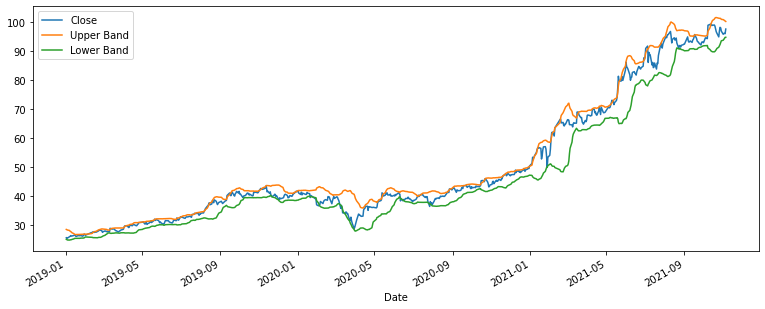

In [28]:
FPT[['Close', 'Upper Band', 'Lower Band']]['2019-01-01':].plot(figsize=(13,5));

In [22]:
MWG['Upper Band']=MWG['Close'].rolling(20).mean()+2*MWG['Close'].rolling(20).std()
MWG['Lower Band']=MWG['Close'].rolling(20).mean()-2*MWG['Close'].rolling(20).std()

In [23]:
MWG=MWG.dropna()

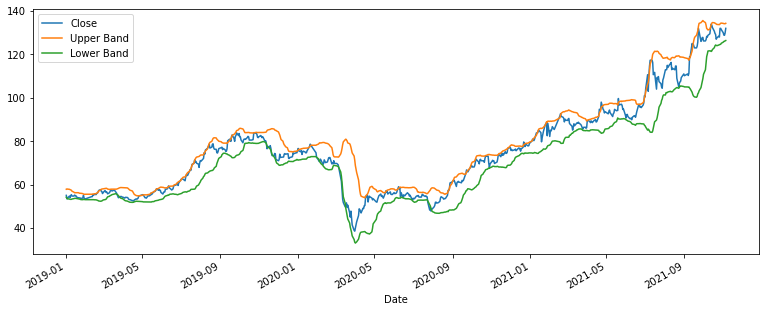

In [29]:
MWG[['Close', 'Upper Band', 'Lower Band']]['2019-01-01':].plot(figsize=(13,5));